# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('real_estate_data.csv', sep='\t')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest', 'parks_around3000': 'parks_around_3000', 'ponds_around3000': 'ponds_around_3000'})

In [4]:
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'city_centers_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around_3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around_3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]]

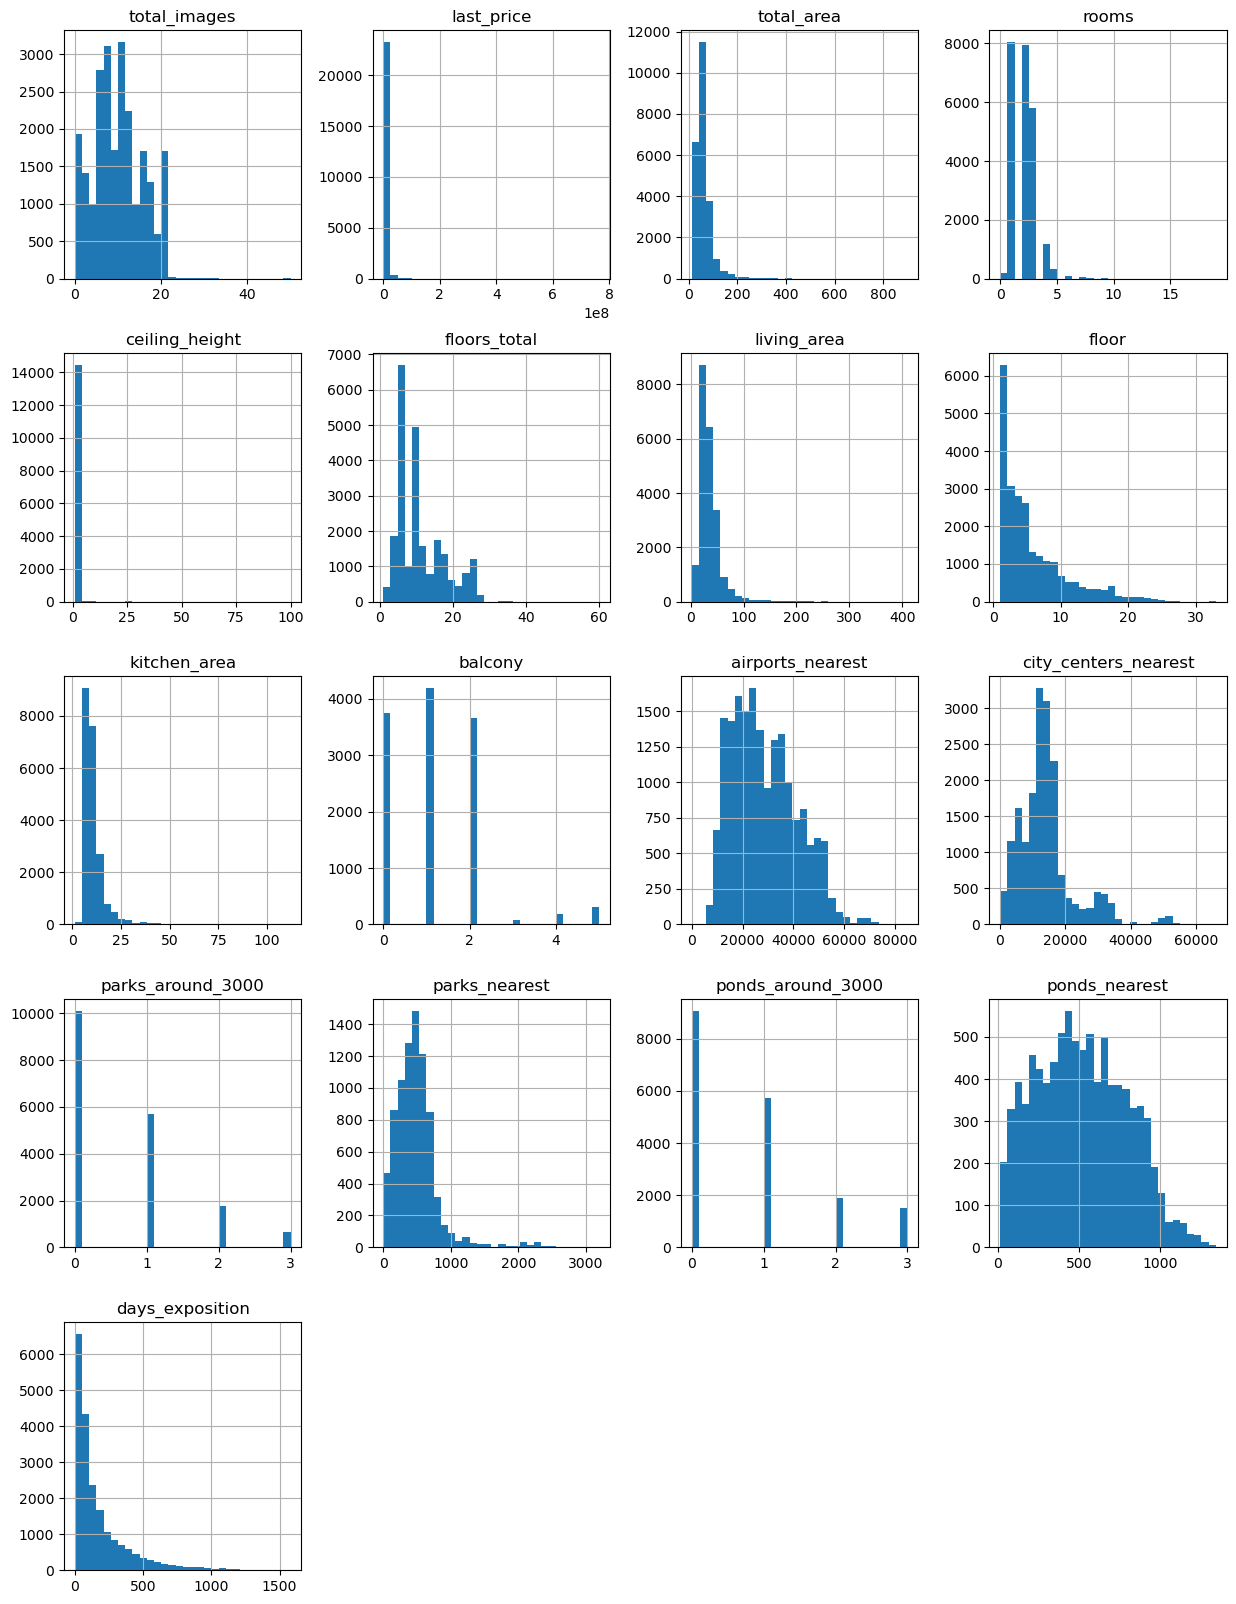

In [5]:
data.hist(figsize=(15, 20), bins=30)

In [6]:
data.duplicated().sum()

0

### Предобработка данных

In [7]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Больше, чем у половины столбцов есть пропущенные значения, их необходимо обработать, либо оставить. Также со столбцами необходимо провести другие манипуляции. В частности, изменить тип данных, устранить неявные дубликаты, устранить некорректные значения. \
В связи с этим, я буду делать предобработку данных у каждого столбца по отдельности. 

**Столбец total_images.** \
Пропусков нет. Тип данных также оптимален: int для кол-во фото. Однако возможно есть другие данные, которые стоит обработать...

<AxesSubplot:>

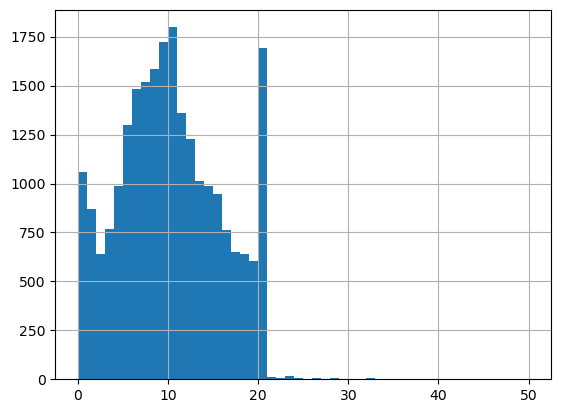

In [8]:
data['total_images'].hist(bins=50)

In [9]:
data[data['total_images'] == 20]['total_images'].count()

1694

In [10]:
data['total_images'].describe()

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

В данных замечен выброс значений - слишком много объявлений с количеством фото 20 шт. Скорее всего произошла ошибка загрузки данных и это значение равно 2. 

**Столбец last_price** \
Пропущенных значений нет, необходимо проверить нужен ли тип float или достаточно только int.

In [11]:
data[data['last_price'] % 1 != 0]['last_price'].count()

0

Нет ни одного вещественного значения, значит меняем весь стобец на тип данных int.

In [12]:
data['last_price'] = data['last_price'].astype('int')

In [13]:
data['last_price'] = data['last_price'] / 1000000
data['last_price'].describe()

count    23699.000000
mean         6.541549
std         10.887013
min          0.012190
25%          3.400000
50%          4.650000
75%          6.800000
max        763.000000
Name: last_price, dtype: float64

In [14]:
data['last_price'] = data['last_price'] * 1000000

В данных есть существенное отклонение от среднего значения, также очень большое максимальное значение. Необходимо проанализировать выбросы данных с помощью квартилей. 

In [15]:
def right_whisker(column):
    quant1 = data[column].quantile(0.25)
    quant3 = data[column].quantile(0.75)
    IQR = quant3 - quant1
    right_whisker = quant3 + 1.5 * IQR
    return right_whisker

In [16]:
def left_whisker(column):
    quant1 = data[column].quantile(0.25)
    quant3 = data[column].quantile(0.75)
    IQR = quant3 - quant1
    left_whisker = quant1 - 1.5 * IQR
    return left_whisker

In [17]:
len(data[data['last_price'] > right_whisker('last_price')]) / len(data) * 100

8.582640617747584

In [18]:
data[data['last_price'] > right_whisker('last_price')].sort_values(by='last_price', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.00,2017-09-30T00:00:00,7,NaN,10.0,250.00,10,NaN,...,NaN,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0
19540,8,420000000.0,900.00,2017-12-06T00:00:00,12,2.80,25.0,409.70,25,NaN,...,112.00,NaN,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
14706,15,401300000.0,401.00,2016-02-20T00:00:00,5,NaN,9.0,204.00,9,False,...,24.00,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
1436,19,330000000.0,190.00,2018-04-04T00:00:00,3,3.50,7.0,95.00,5,NaN,...,40.00,NaN,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
15651,20,300000000.0,618.00,2017-12-18T00:00:00,7,3.40,7.0,258.00,5,NaN,...,70.00,NaN,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,111.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17572,13,11950000.0,80.00,2018-05-08T00:00:00,3,2.73,4.0,50.70,4,NaN,...,9.00,NaN,Санкт-Петербург,20923.0,1139.0,3.0,221.0,3.0,87.0,205.0
16610,11,11940000.0,112.00,2015-11-19T00:00:00,3,3.00,5.0,64.00,2,NaN,...,23.00,0.0,NaN,21219.0,1322.0,1.0,740.0,3.0,365.0,319.0
22038,10,11940000.0,206.00,2018-12-12T00:00:00,5,3.50,6.0,160.00,3,NaN,...,26.00,NaN,Санкт-Петербург,20123.0,1852.0,3.0,510.0,3.0,417.0,90.0
14028,6,11939000.0,94.15,2018-03-26T00:00:00,3,2.70,10.0,55.22,10,NaN,...,12.23,1.0,Санкт-Петербург,30917.0,3896.0,2.0,456.0,3.0,91.0,52.0


8,5% данных от общего числа - это досточно много. Так как стоимость квартир сильно отличается необходимо обрезать часть данных, если их не очень много. Проверим:

In [19]:
data[data['last_price'] >= 30000000]['last_price'].count()
data = data[data['last_price'] < 30000000]

In [20]:
data[data['last_price'] >= 20000000]['last_price'].count()

397

In [21]:
data['last_price'] = data['last_price'] / 1000000
data['last_price'].describe()

count    23373.000000
mean         5.732739
std          4.010730
min          0.012190
25%          3.400000
50%          4.600000
75%          6.650000
max         29.999000
Name: last_price, dtype: float64

In [22]:
data['last_price'] = data['last_price'] * 1000000

Таким образом мы убрали правый ус с существенными выбросами. \
Теперь проверим то, как много небольших значений

In [23]:
data[data['last_price'] < 400000]['last_price'].count()

1

**Столбец total_area** \
Пропусков нет. И вещественные значения есть. Проверим разбросы

In [24]:
data['total_area'].describe()

count    23373.000000
mean        58.222268
std         28.088829
min         12.000000
25%         40.000000
50%         51.500000
75%         68.300000
max        460.800000
Name: total_area, dtype: float64

<AxesSubplot:>

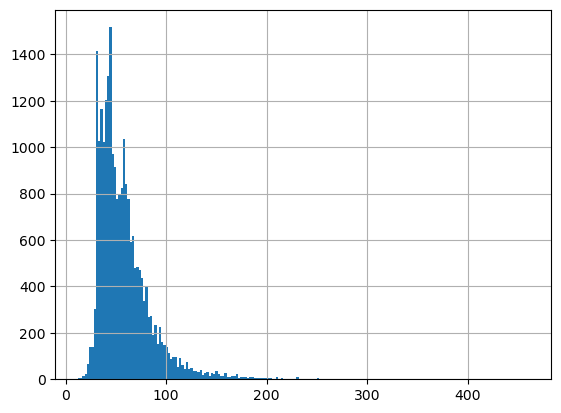

In [25]:
data['total_area'].hist(bins=200)

Существенных выбросов не наблюдается, проверим большие значения, можно ли их удалять. 

In [26]:
data[data['total_area'] > 200]['last_price'].count()

92

In [27]:
len(data[data['total_area'] > right_whisker('total_area')])

1070

In [28]:
data[data['total_area'] > right_whisker('total_area')].sort_values(by='total_area', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
20273,12,20000000.0,460.80,2019-03-20T00:00:00,6,3.10,3.0,279.6,1,NaN,...,55.50,NaN,Санкт-Петербург,43756.0,15459.0,1.0,852.0,3.0,122.0,21.0
3676,12,28789000.0,441.98,2019-01-23T00:00:00,4,NaN,6.0,NaN,6,NaN,...,35.05,NaN,Санкт-Петербург,20552.0,5181.0,0.0,NaN,0.0,NaN,NaN
22131,14,27000000.0,422.20,2018-10-18T00:00:00,5,2.70,13.0,NaN,11,NaN,...,NaN,NaN,Санкт-Петербург,46625.0,16554.0,0.0,NaN,0.0,NaN,NaN
866,5,25000000.0,363.00,2017-12-23T00:00:00,14,3.16,5.0,222.0,4,NaN,...,16.60,NaN,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
16179,11,28000000.0,336.00,2017-09-27T00:00:00,5,3.00,3.0,106.1,2,NaN,...,21.00,1.0,Санкт-Петербург,15036.0,14795.0,2.0,668.0,0.0,NaN,172.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7972,6,12000000.0,111.00,2016-04-12T00:00:00,3,3.00,25.0,57.0,23,NaN,...,18.00,2.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,915.0
20750,6,7600000.0,111.00,2018-10-17T00:00:00,5,NaN,14.0,73.0,9,NaN,...,8.50,1.0,Петергоф,45110.0,48534.0,0.0,NaN,0.0,NaN,NaN
2660,10,6650000.0,111.00,2017-05-26T00:00:00,3,NaN,16.0,65.3,7,NaN,...,14.00,1.0,Санкт-Петербург,18750.0,22175.0,0.0,NaN,1.0,649.0,98.0
17863,20,23500000.0,111.00,2019-03-06T00:00:00,3,3.00,9.0,60.0,6,NaN,...,25.00,NaN,Санкт-Петербург,32685.0,6131.0,0.0,NaN,1.0,357.0,NaN


Правый ус достаточно большой, а квартир, которые были бы больше 200 кв. м. не так много. Удалим их.

In [29]:
data = data[data['total_area'] < 200]

**Столбец first_day_exposition** \
Этот столбец является датой. Проверим столбец на пустые значения

In [30]:
data['first_day_exposition'].isna().sum()

0

Будет удобнее работать с форматом datetime, переведем столбец в этот формат.

In [31]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')




**Столбец rooms** \
Этот столбец является датой. Проверим столбец на пустые значения

In [32]:
data['rooms'].isna().sum()

0

Пропусков нет. Тип данных int также оптимален для этого столбца. Проверим распределение данных

<AxesSubplot:>

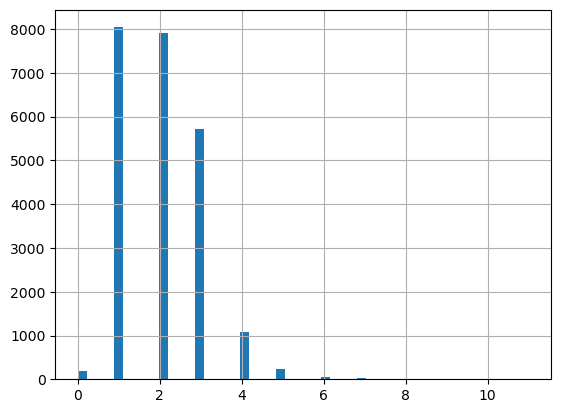

In [33]:
 data['rooms'].hist(bins=50)

In [34]:
data['rooms'].describe()

count    23278.000000
mean         2.022940
std          0.986086
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         11.000000
Name: rooms, dtype: float64

In [35]:
len(data[data['rooms'] > right_whisker('rooms')])

22

Выбросов в данных нет, поэтому все хорошо. Начинаем рассматривать следующий столбец

**Столбец ceiling_height** \
Этот столбец является датой. Проверим столбец на пустые значения

In [36]:
data['ceiling_height'].isna().sum()

9049

Пропусков очень много. Скорее всего причина в человеческом факторе - многие пользователи не указывают высоту потолков. \
Так как на стоимость квартиры высота потолков сильно не оказывает влияние и пропущенных данных слишком много, мы не будем удалять или заполнять эти данные.

Так как с типом данных в этом столбце все нормально. Проверим наличие выбросов

<AxesSubplot:>

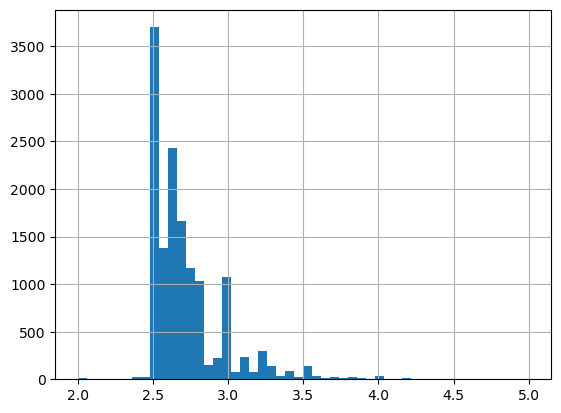

In [37]:
data['ceiling_height'].hist(bins=50, range=(2, 5))

In [38]:
data['ceiling_height'].describe()

count    14229.000000
mean         2.761019
std          1.269020
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [39]:
len(data[data['ceiling_height'] > right_whisker('ceiling_height')])

677

Разброс значений не очень большой, но все таки есть. Также смущает максимальное значение: 100. Потолки такой высоты вряд ли существуют в квартирах, видимо где-то ошибка

In [40]:
data[data['ceiling_height'] > right_whisker('ceiling_height')].sort_values(by='ceiling_height', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25,1,100.00,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
22336,19,9999000.0,92.4,2019-04-05,2,32.00,6.0,55.5,5,False,...,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
3148,14,2900000.0,75.0,2018-11-12,3,32.00,3.0,53.0,2,NaN,...,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21377,19,4900000.0,42.0,2017-04-18,1,27.50,24.0,37.7,19,False,...,11.0,2.0,Санкт-Петербург,42742.0,9760.0,0.0,NaN,0.0,NaN,61.0
20478,11,8000000.0,45.0,2017-07-18,1,27.00,4.0,22.0,2,NaN,...,10.0,1.0,Санкт-Петербург,18975.0,3246.0,0.0,NaN,3.0,449.0,429.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840,16,7500000.0,77.0,2018-03-26,3,3.25,5.0,44.0,1,NaN,...,20.0,NaN,Санкт-Петербург,21828.0,10418.0,3.0,493.0,1.0,898.0,263.0
14990,4,10000000.0,108.0,2015-11-10,3,3.25,6.0,67.0,4,False,...,6.0,NaN,Санкт-Петербург,24321.0,4889.0,1.0,349.0,0.0,NaN,NaN
13754,2,6700000.0,86.0,2017-10-21,4,3.25,6.0,60.0,3,NaN,...,9.0,NaN,Санкт-Петербург,21758.0,5218.0,1.0,218.0,2.0,203.0,252.0
21647,17,7200000.0,68.5,2015-12-10,3,3.25,5.0,33.3,5,NaN,...,20.0,0.0,Санкт-Петербург,27566.0,6998.0,1.0,920.0,1.0,655.0,396.0


In [41]:
data[data['ceiling_height'] > 10]['ceiling_height'].count()

25

In [42]:
data[data['ceiling_height'] > 9]['ceiling_height'].value_counts()

27.0     8
25.0     7
32.0     2
24.0     1
26.0     1
14.0     1
20.0     1
22.6     1
27.5     1
10.3     1
100.0    1
Name: ceiling_height, dtype: int64

In [43]:
data[data['ceiling_height'] < 2]['ceiling_height'].value_counts()

1.20    1
1.75    1
1.00    1
Name: ceiling_height, dtype: int64

Скорее всего, большие значения больше и равные 20 означают, что потолок в 10 раз меньше по высоте, а те значения, которые меньше 2 означают, что они больше в 10 раз.

In [44]:
rowsBig = (data['ceiling_height'] / 10 >= 1) & (data['ceiling_height'] / 10 <= 10)
data.loc[rowsBig, 'ceiling_height'] = data['ceiling_height'] / 10

In [45]:
data[data['ceiling_height'] < 2]['ceiling_height'].value_counts()

1.20    1
1.40    1
1.75    1
1.03    1
1.00    1
Name: ceiling_height, dtype: int64

In [46]:
data['ceiling_height'].describe()

count    14229.000000
mean         2.716781
std          0.283017
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max         10.000000
Name: ceiling_height, dtype: float64

Аномальные значения удалены. Оставлены только несколько квартир с высотой потолка более 5 метров, так как такое жилье возможно, если оно находится в центре, в историческом здании, наподобие Дома Зингера

**Столбец floors_total** \
Необходимо проверить столбец на пустоту и тип данных.

In [47]:
data['floors_total'].isna().sum()

85

Пропущенных значений немного, скорее всего пользователи просто не заполнили эти данные, так как не все задумываются и даже не знают сколько в их доме этажей. 

In [48]:
data[data['floors_total'] % 1 != 0]['floors_total'].count()

0

Вещественных значений нет, поэтому изменим тип данных на int, но сначала необходимо заменить пропущенные значения. На 0 заменять их не имеет смысла, поэтому сделаем замену на медиану, после чего поменяем тип данных.

In [49]:
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())

<AxesSubplot:>

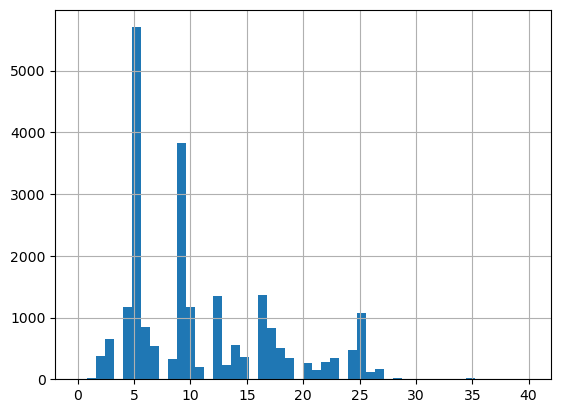

In [50]:
data['floors_total'].hist(bins=50, range=(0, 40))

In [51]:
data['floors_total'].describe()

count    23278.000000
mean        10.725964
std          6.609993
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Теперь необходимо выяснить насколько значительные выбросы данных есть в этом столбце

In [52]:
len(data[data['floors_total'] > right_whisker('floors_total')])

32

In [53]:
data = data[data['floors_total'] < 33]

In [54]:
data['floors_total'] = data['floors_total'].astype('int')

**Столбец living_area** \
Ознакомимся с данными: изучим, есть ли пропуски, каково распределение данных. Тип float подходит столбцу, так как тут присутствуют вещественные значения

In [55]:
data['living_area'].isna().sum()

1855

Пропусков много, причина по которой они стоят такая же как и с floors_total - людям не свойственно заполнять те значения, о которых они не знают и которые требуют дополнительных действий. Не будем изменять эти значения

<AxesSubplot:>

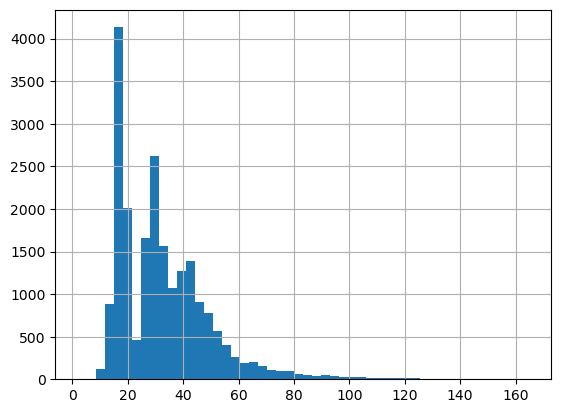

In [56]:
data['living_area'].hist(bins=50)

In [57]:
data['living_area'].describe()

count    21391.000000
mean        32.893514
std         16.821170
min          2.000000
25%         18.500000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

In [58]:
len(data[data['living_area'] > right_whisker('living_area')])

494

In [59]:
len(data)

23246

In [60]:
data[data['living_area'] > 100]['living_area'].count()

138

In [61]:
data[data['living_area'] < 10]['living_area'].count()

24

In [62]:
data = data[(data['living_area'] <= 100) | (data['living_area'].isna())]

In [63]:
data = data[(data['living_area'] >= 10) | (data['living_area'].isna())]

Достаточно большой разброс, а также есть аномально низкие значения

**Столбец floor** \
Проверим на пропуски и на распределение данных

In [64]:
data['floor'].isna().sum()

0

<AxesSubplot:>

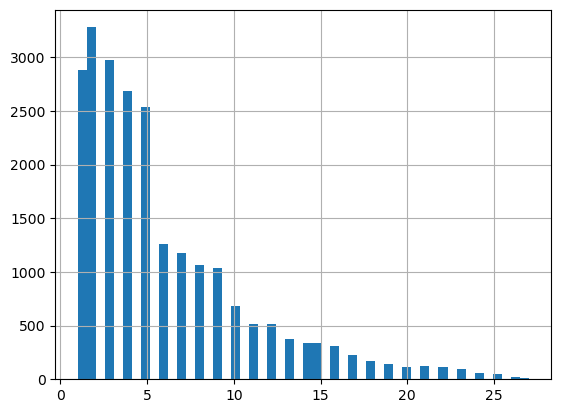

In [65]:
data['floor'].hist(bins=50)

In [66]:
data['floor'].describe()

count    23084.000000
mean         5.897591
std          4.881873
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

In [67]:
len(data[data['floor'] > right_whisker('floor')])

898

Пропусков нет, тип данных подходит, а вот выброс большой, поэтому нужно удалить часть данных

In [68]:
data[data['floor'] > right_whisker('floor')].sort_values(by='floor', ascending=False)




,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
23292,6,2980000.0,36.02,2018-07-26,1,2.65,27,NaN,27,NaN,...,9.26,1.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,72.0
7711,12,4799000.0,60.00,2017-04-18,2,2.50,28,31.0,27,False,...,10.00,2.0,посёлок Парголово,53734.0,19942.0,0.0,NaN,0.0,NaN,87.0
13276,0,4450000.0,38.00,2017-12-10,1,NaN,27,NaN,27,NaN,...,NaN,NaN,посёлок Парголово,52480.0,18657.0,0.0,NaN,0.0,NaN,76.0
16644,2,4538000.0,57.37,2018-02-28,2,NaN,27,33.6,27,NaN,...,9.72,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,258.0
4091,4,3900000.0,37.00,2017-12-06,1,NaN,27,13.0,27,NaN,...,12.00,NaN,посёлок Парголово,52783.0,18957.0,0.0,NaN,0.0,NaN,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10475,14,4600000.0,39.10,2018-08-18,1,NaN,18,10.3,18,NaN,...,14.40,NaN,Санкт-Петербург,32308.0,8387.0,0.0,NaN,0.0,NaN,73.0
10430,8,2900000.0,41.20,2018-03-06,1,3.00,18,17.0,18,NaN,...,13.00,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,74.0
10312,8,8450000.0,100.00,2018-03-26,3,NaN,19,57.0,18,NaN,...,12.00,NaN,Санкт-Петербург,18428.0,16134.0,1.0,739.0,1.0,758.0,101.0
10258,20,5060000.0,37.00,2018-01-05,1,NaN,25,NaN,18,NaN,...,NaN,NaN,Санкт-Петербург,11819.0,13265.0,0.0,NaN,0.0,NaN,60.0


In [69]:
data[data['floor'] > 24]['floor'].count()

75

Удалим эти значения из выборки

In [70]:
data = data[data['floor'] < 25]

**Столбец is_apartment**

In [71]:
data['is_apartment'].isna().sum()

20316

In [72]:
data['is_apartment'].value_counts()

False    2650
True       43
Name: is_apartment, dtype: int64

Пропущенных значений очень много, но так данные имеют булевые значения, то вероятнее всего пропущенные значения - False. В связи с этим, необходимо изменить еще тип данных. А причина по которой данные были пропущены - скорее всего ошибка загрузки данных из системы

In [73]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'] = data['is_apartment'].astype('bool')

**Столбец studio**

In [74]:
data['studio'].isna().sum()

0

In [75]:
data['studio'].value_counts()

False    22863
True       146
Name: studio, dtype: int64

В этих данных изменять ничего не нужно

**Столбец open_plan**

In [76]:
data['open_plan'].isna().sum()

0

In [77]:
data['open_plan'].value_counts()

False    22946
True        63
Name: open_plan, dtype: int64

В этих данных изменять ничего не нужно

**Столбец kitchen_area**

In [78]:
data['kitchen_area'].isna().sum()

2211

<AxesSubplot:>

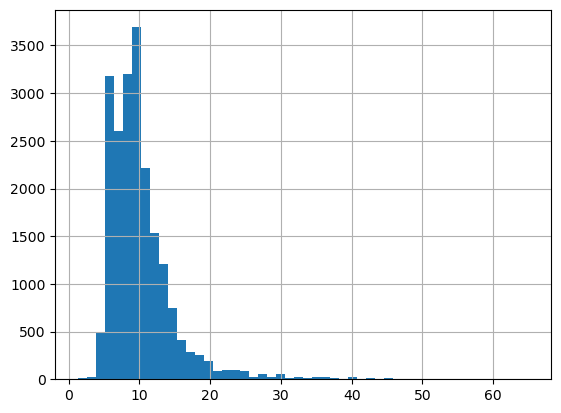

In [80]:
data['kitchen_area'].hist(bins=50)

In [81]:
data['kitchen_area'].describe()

count    20798.000000
mean        10.193720
std          4.938505
min          1.300000
25%          7.000000
50%          9.000000
75%         11.600000
max         65.000000
Name: kitchen_area, dtype: float64

In [82]:
len(data[data['kitchen_area'] > right_whisker('kitchen_area')])

1024

In [83]:
data[data['kitchen_area'] > right_whisker('kitchen_area')].sort_values(by='kitchen_area', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
22980,19,24500000.0,155.40,2017-10-10,3,3.00,4,72.00,2,False,...,65.00,NaN,Санкт-Петербург,43758.0,15461.0,1.0,756.0,2.0,278.0,325.0
15780,9,12990000.0,119.60,2017-03-13,3,3.00,5,36.40,4,False,...,64.00,4.0,Пушкин,18616.0,30770.0,1.0,569.0,0.0,NaN,NaN
19499,10,8000000.0,118.00,2017-08-31,3,3.00,5,36.00,4,False,...,64.00,4.0,Пушкин,18616.0,30770.0,1.0,569.0,0.0,NaN,7.0
14900,20,25900000.0,125.60,2018-08-14,2,4.00,4,42.70,4,False,...,62.50,2.0,Пушкин,13426.0,25580.0,0.0,NaN,0.0,NaN,194.0
3561,5,12300000.0,115.00,2017-08-09,3,2.70,20,45.00,16,False,...,60.00,1.0,Санкт-Петербург,33386.0,14234.0,0.0,NaN,0.0,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21792,15,13900000.0,101.40,2018-07-26,3,2.97,4,68.10,3,False,...,18.60,NaN,Санкт-Петербург,15163.0,10969.0,0.0,NaN,1.0,585.0,200.0
19638,19,5690000.0,78.00,2018-01-16,4,2.55,9,54.00,1,False,...,18.60,2.0,Колпино,24799.0,30585.0,0.0,NaN,1.0,918.0,226.0
12530,20,4400000.0,39.03,2019-04-21,1,2.75,7,36.90,7,False,...,18.60,2.0,городской посёлок Новоселье,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9009,2,27243166.0,150.61,2015-01-05,5,2.80,12,95.45,12,False,...,18.59,1.0,Санкт-Петербург,19466.0,4096.0,0.0,NaN,1.0,129.0,658.0


In [84]:
data[data['kitchen_area'] > 40]['kitchen_area'].count()

66

In [85]:
data[data['kitchen_area'] < 3]['kitchen_area'].count()

11

In [86]:
data = data[(data['kitchen_area'] <= 40) | (data['kitchen_area'].isna())]
data = data[(data['kitchen_area'] >= 3) | (data['kitchen_area'].isna())]

In [87]:
len(data)

22932

**Столбец balcony**

In [88]:
data['balcony'].isna().sum()

11116

Скорее всего пользователи не заполняли поле Балкон, если у них его нет. Поэтому заменим все пропуски на 0. Также изменим тип, если это необходимо

In [89]:
data['balcony'] = data['balcony'].fillna(0)

In [90]:
data[data['balcony'] % 1 != 0]['balcony'].count()

0

In [91]:
data['balcony'] = data['balcony'].astype('int')

<AxesSubplot:>

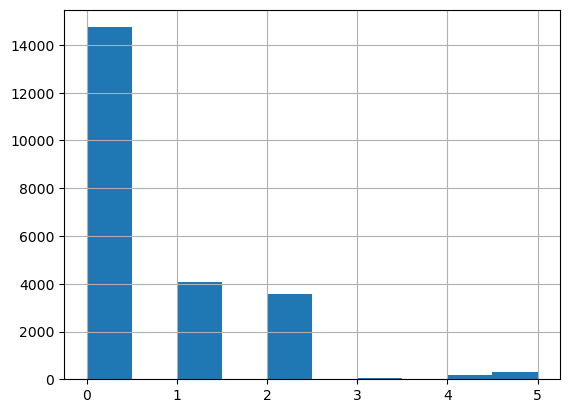

In [92]:
data['balcony'].hist()

In [93]:
data['balcony'].describe()

count    22932.000000
mean         0.593014
std          0.957029
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

In [94]:
len(data[data['balcony'] > right_whisker('balcony')])

534

Выброс есть, однако данные удалять не будем, потому что столбец имеет мало возможных значений. Эти данные нам еще могут понадобиться.

**Столбец locality_name**

In [95]:
data['locality_name'].isna().sum()

48

Так как пропущенных немного и заменить их не получится, удалим их

In [96]:
data = data.dropna(subset=['locality_name'])
data['locality_name'].isna().sum()

0

In [97]:
ln_list = list(data['locality_name'].unique())
ln_list.sort()
print(*ln_list, sep='\n')
ln_list = pd.Series(ln_list)

Бокситогорск
Волосово
Волхов
Всеволожск
Выборг
Высоцк
Гатчина
Зеленогорск
Ивангород
Каменногорск
Кингисепп
Кириши
Кировск
Колпино
Коммунар
Красное Село
Кронштадт
Кудрово
Лодейное Поле
Ломоносов
Луга
Любань
Мурино
Никольское
Новая Ладога
Отрадное
Павловск
Петергоф
Пикалёво
Подпорожье
Приморск
Приозерск
Пушкин
Санкт-Петербург
Светогорск
Сертолово
Сестрорецк
Сланцы
Сосновый Бор
Сясьстрой
Тихвин
Тосно
Шлиссельбург
городской поселок Большая Ижора
городской поселок Янино-1
городской посёлок Будогощь
городской посёлок Виллози
городской посёлок Лесогорский
городской посёлок Мга
городской посёлок Назия
городской посёлок Новоселье
городской посёлок Павлово
городской посёлок Рощино
городской посёлок Свирьстрой
городской посёлок Советский
городской посёлок Фёдоровское
городской посёлок Янино-1
деревня Агалатово
деревня Аро
деревня Батово
деревня Бегуницы
деревня Белогорка
деревня Большая Вруда
деревня Большая Пустомержа
деревня Большие Колпаны
деревня Большое Рейзино
деревня Большой Сабск
деревня 

In [98]:
list_village = ['городской поселок', 'городской посёлок', 'поселок', 'поселок городского типа', 'посёлок городского типа', 'посёлок при железнодорожной станции', 'коттеджный поселок', 'коттеджный посёлок', 'поселок станции', 'посёлок станции']
loc_name = data['locality_name']

for item in list_village:
    loc_name = loc_name.str.replace(item, 'посёлок')
loc_name = loc_name.str.replace('садоводческое некоммерческое товарищество', 'садовое товарищество')

ln_list = list(data['locality_name'].unique())
ln_list.sort()
print(*ln_list, sep='\n')
ln_list = pd.Series(ln_list)

Бокситогорск
Волосово
Волхов
Всеволожск
Выборг
Высоцк
Гатчина
Зеленогорск
Ивангород
Каменногорск
Кингисепп
Кириши
Кировск
Колпино
Коммунар
Красное Село
Кронштадт
Кудрово
Лодейное Поле
Ломоносов
Луга
Любань
Мурино
Никольское
Новая Ладога
Отрадное
Павловск
Петергоф
Пикалёво
Подпорожье
Приморск
Приозерск
Пушкин
Санкт-Петербург
Светогорск
Сертолово
Сестрорецк
Сланцы
Сосновый Бор
Сясьстрой
Тихвин
Тосно
Шлиссельбург
городской поселок Большая Ижора
городской поселок Янино-1
городской посёлок Будогощь
городской посёлок Виллози
городской посёлок Лесогорский
городской посёлок Мга
городской посёлок Назия
городской посёлок Новоселье
городской посёлок Павлово
городской посёлок Рощино
городской посёлок Свирьстрой
городской посёлок Советский
городской посёлок Фёдоровское
городской посёлок Янино-1
деревня Агалатово
деревня Аро
деревня Батово
деревня Бегуницы
деревня Белогорка
деревня Большая Вруда
деревня Большая Пустомержа
деревня Большие Колпаны
деревня Большое Рейзино
деревня Большой Сабск
деревня 

In [99]:
data['locality_name'].nunique()

363

**Столбец airports_nearest** \
Изучим данные на пропуски и на тип

In [100]:
data['airports_nearest'].isna().sum()

5492

In [101]:
data[data['airports_nearest'] % 1 != 0]['airports_nearest'].count()

0

Пропущенных значений очень много, видимо существует ошибка в выгрузке данных, удалять эти значения не будем. Поменяем тип данных на int.

In [102]:
data['airports_nearest'] = data[~data['airports_nearest'].isna()]['airports_nearest'].astype('int')



<AxesSubplot:>

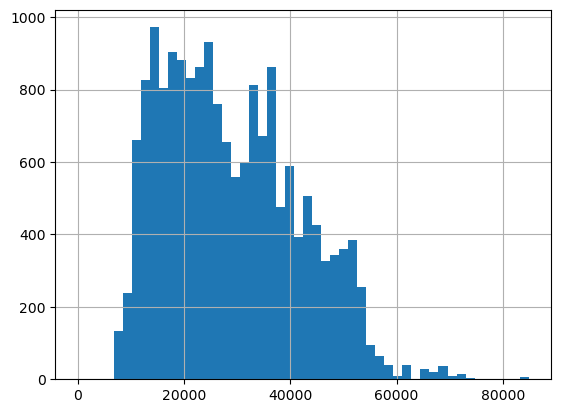

In [103]:
data['airports_nearest'].hist(bins=50)

In [104]:
data['airports_nearest'].describe()

count    17392.000000
mean     28858.493100
std      12761.218247
min          0.000000
25%      18410.000000
50%      26912.500000
75%      37434.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [105]:
len(data[data['airports_nearest'] > right_whisker('airports_nearest')])

95

Выброс небольшой, можно убрать эти значения. При этом смущает нулевое расстояние от аэропорта, проверим это значение.

In [106]:
data[data['airports_nearest'] == 0]['airports_nearest'].count()

1

In [107]:
data = data[data['airports_nearest'] != 0]

**Столбец cityCenters_nearest** \
Изучим данные на пропуски и на тип

In [109]:
data['city_centers_nearest'].isna().sum()

5472

Пропущенных значений слишком много. Скорее всего причина опять же в выгрузке данных. В отличие от удаленности от аэропорта, расстояние до центра - существенный показатель, который влияет на стоимость квартиры. Удалять их конечно же не будем. Изучим подходит ли тот тип данных, который сейчас у данного столбца.

In [110]:
data[data['city_centers_nearest'] % 1 != 0]['city_centers_nearest'].count()

0

In [111]:
data['city_centers_nearest'] = data[~data['city_centers_nearest'].isna()]['city_centers_nearest'].astype('int')

<AxesSubplot:>

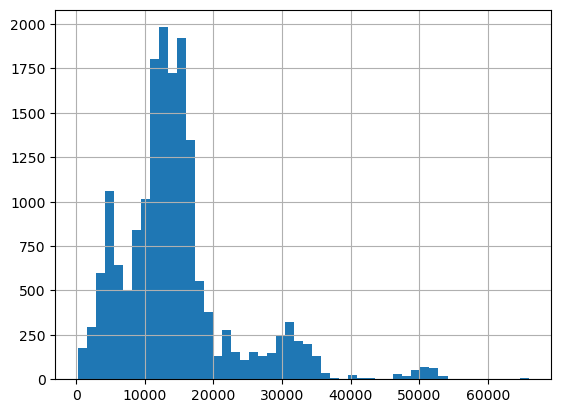

In [112]:
data['city_centers_nearest'].hist(bins=50)

In [113]:
data['city_centers_nearest'].describe()

count    17411.000000
mean     14449.922061
std       8584.313974
min        208.000000
25%       9743.000000
50%      13242.000000
75%      16407.500000
max      65968.000000
Name: city_centers_nearest, dtype: float64

In [114]:
len(data[data['city_centers_nearest'] > right_whisker('city_centers_nearest')])

1760

In [115]:
data[data['city_centers_nearest'] > right_whisker('city_centers_nearest')].sort_values(by='city_centers_nearest', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
9640,8,4200000.0,51.4,2014-12-10,2,2.55,5,31.0,2,False,...,6.0,1,посёлок Молодёжное,84869.0,65968.0,0.0,NaN,0.0,NaN,1194.0
5340,19,3600000.0,50.6,2019-03-19,2,2.50,5,29.9,4,False,...,7.0,1,посёлок Молодёжное,84853.0,65952.0,0.0,NaN,0.0,NaN,NaN
577,7,4000000.0,59.0,2017-07-23,3,2.50,5,37.0,1,False,...,7.0,0,посёлок Молодёжное,84665.0,65764.0,0.0,NaN,0.0,NaN,NaN
20746,1,3300000.0,43.5,2016-02-16,2,2.55,4,27.2,2,False,...,5.0,1,посёлок Молодёжное,84006.0,65105.0,0.0,NaN,0.0,NaN,1043.0
5218,15,3650000.0,53.8,2018-09-24,3,2.50,4,36.9,3,False,...,5.2,0,посёлок Молодёжное,83758.0,64857.0,0.0,NaN,0.0,NaN,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19741,8,3670000.0,43.0,2018-03-03,2,2.50,5,25.0,1,False,...,5.2,0,Пушкин,14279.0,26433.0,0.0,NaN,0.0,NaN,251.0
3613,10,3800000.0,44.0,2018-04-05,2,2.50,5,28.0,4,False,...,6.0,0,Пушкин,14279.0,26433.0,0.0,NaN,0.0,NaN,280.0
12785,10,3100000.0,32.0,2015-06-26,1,2.50,5,18.0,4,False,...,5.5,1,Пушкин,14272.0,26426.0,0.0,NaN,0.0,NaN,1054.0
2653,8,3680000.0,43.0,2016-02-19,2,2.50,5,27.9,2,False,...,4.9,0,Пушкин,14270.0,26423.0,0.0,NaN,0.0,NaN,523.0


Выброс большой, посмотрим, можно ли сократить этот выброс, удалив часть значений

In [116]:
data[data['city_centers_nearest'] > 52000]['city_centers_nearest'].count()

68

In [117]:
data[data['city_centers_nearest'] == 0]['city_centers_nearest'].count()

0

Удалять данные не стоит, так как во-первых удаленность от центра существенно влияет на стоимость квартиры, а во вторых удалив данные, мы рискуем потерять удаленные населенные пункты.

**Столбец parks_around_3000** \
Изучим пропуски в данных и изменим их тип, если это необходимо, учитывая пропуски

In [118]:
data['parks_around_3000'].isna().sum()

5471

Пропусков много, в случае с этим столбцом есть два варианта. Первый - некорректная выгрузка данных, вторый - отсутствие значения означает 0. В любом случае, не имея точной информации данные удалять не будем

In [119]:
data[data['parks_around_3000'] % 1 != 0]['parks_around_3000'].count()

0

In [120]:
data['parks_around_3000'] = data[~data['parks_around_3000'].isna()]['parks_around_3000'].astype('int')

Теперь изучим распредение данных

<AxesSubplot:>

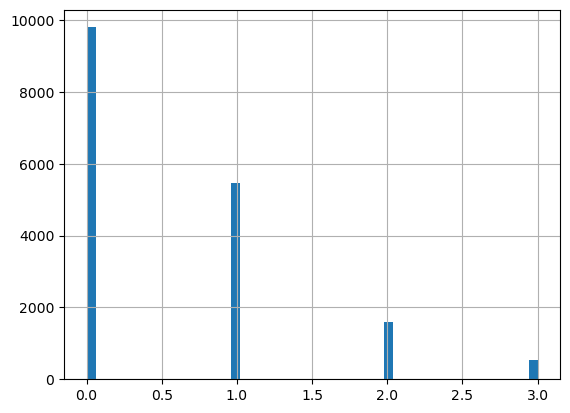

In [121]:
data['parks_around_3000'].hist(bins=50)

In [122]:
data['parks_around_3000'].describe()

count    17412.000000
mean         0.591833
std          0.783354
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around_3000, dtype: float64

In [123]:
len(data[data['parks_around_3000'] > right_whisker('parks_around_3000')])

546

In [124]:
data['parks_around_3000'].value_counts()

0.0    9800
1.0    5465
2.0    1601
3.0     546
Name: parks_around_3000, dtype: int64

Эти данные категориальные, поэтому мы не будем удалять их.

**Столбец parks_nearest**

In [125]:
data['parks_nearest'].isna().sum()

15267

Пропусков больше половины. Скорее всего причина в выгрузке данных. Проверим, можем ли мы изменить тип данных и проверим их разброс

In [126]:
data[data['parks_nearest'] % 1 != 0]['parks_nearest'].count()

0

In [127]:
data['parks_nearest'] = data[~data['parks_nearest'].isna()]['parks_nearest'].astype('int')

<AxesSubplot:>

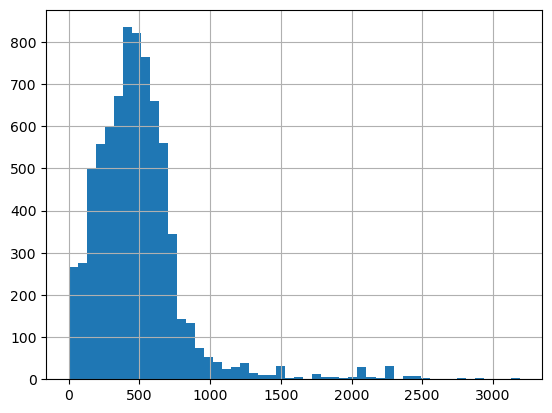

In [128]:
data['parks_nearest'].hist(bins=50)

In [129]:
len(data[data['parks_nearest'] > right_whisker('parks_nearest')])

300

In [130]:
data[data['parks_nearest'] > right_whisker('parks_nearest')].sort_values(by='parks_nearest', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
19430,9,3900000.0,30.5,2018-02-22,1,2.60,5,16.50,1,False,...,5.5,0,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,176.0
10959,9,3000000.0,31.1,2017-03-21,1,NaN,5,17.70,2,False,...,5.5,0,Санкт-Петербург,14821.0,9734.0,0.0,3190.0,1.0,431.0,234.0
1590,3,7500000.0,70.0,2017-07-11,2,NaN,18,37.00,13,False,...,10.0,0,Санкт-Петербург,14878.0,9791.0,0.0,3064.0,1.0,264.0,4.0
19208,17,14950000.0,187.0,2017-10-12,5,3.00,2,80.00,2,False,...,17.0,1,Санкт-Петербург,36805.0,8656.0,0.0,3013.0,3.0,537.0,49.0
23080,15,4650000.0,44.5,2018-02-20,2,NaN,5,25.20,2,False,...,5.5,1,Санкт-Петербург,14965.0,9877.0,1.0,2984.0,1.0,284.0,152.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13391,8,10900000.0,70.3,2017-10-10,2,2.80,17,31.00,8,False,...,15.0,3,Санкт-Петербург,12405.0,8376.0,1.0,1114.0,3.0,950.0,89.0
6919,15,13450000.0,77.0,2016-06-20,3,NaN,17,44.05,6,False,...,12.2,2,Санкт-Петербург,12405.0,8376.0,1.0,1114.0,3.0,950.0,7.0
2701,18,23000000.0,132.4,2018-08-27,3,2.80,17,71.00,8,False,...,19.0,0,Санкт-Петербург,12405.0,8376.0,1.0,1114.0,3.0,950.0,15.0
4523,19,4000000.0,40.0,2018-08-22,1,NaN,16,16.50,12,False,...,11.4,0,Санкт-Петербург,23274.0,12138.0,1.0,1103.0,1.0,1087.0,85.0


Выброс данных есть, проверим, можем ли мы удалить некоторые данные.

In [131]:
data[data['parks_nearest'] > 2000]['parks_nearest'].count()

111

In [132]:
data[data['parks_nearest'] < 5]['parks_nearest'].count()

3

In [133]:
data = data[(data['parks_nearest'] <= 2000) | (data['parks_nearest'].isna())]
data = data[(data['parks_nearest'] >= 5) | (data['parks_nearest'].isna())]

**Столбец ponds_around_3000**

In [134]:
data['ponds_around_3000'].isna().sum()

5471

Как и в прошлом столбце пропуски вызваны скорее всего ошибкой выгрузки данных

In [135]:
data[data['ponds_around_3000'] % 1 != 0]['ponds_around_3000'].count()

0

Поменяем тип данных

In [136]:
data['ponds_around_3000'] = data[~data['ponds_around_3000'].isna()]['ponds_around_3000'].astype('int')

Теперь исследуем распределение данных

<AxesSubplot:>

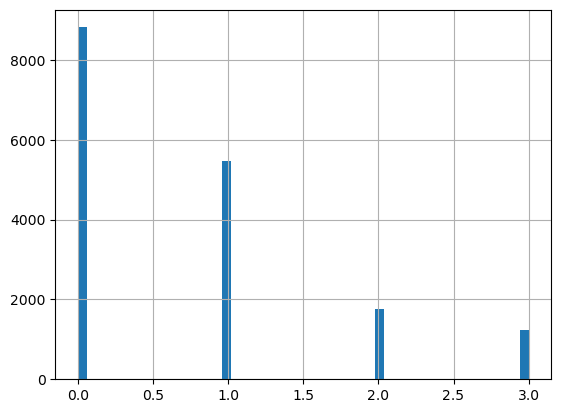

In [137]:
data['ponds_around_3000'].hist(bins=50)

Данные категориальные, поэтому выбросы изучать мы не будем.

**Столбец ponds_nearest** 

In [138]:
data['ponds_nearest'].isna().sum()

14289

Пропуски скорее всего возникли по той же причине, что и у двух предыдущих столбцов.

In [139]:
data[data['ponds_nearest'] % 1 != 0]['ponds_nearest'].count()

0

In [140]:
data['ponds_nearest'] = data[~data['ponds_nearest'].isna()]['ponds_nearest'].astype('int')

После изменения типа данных изучим распределение данных.

<AxesSubplot:>

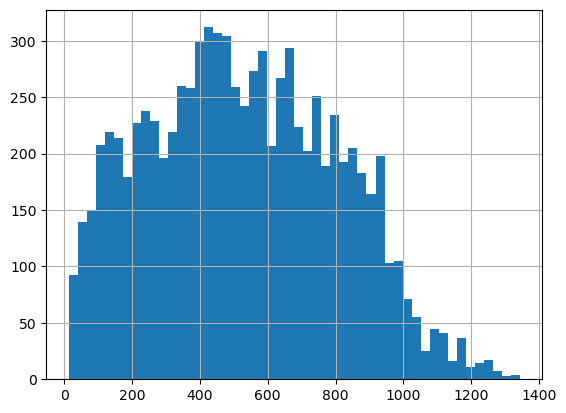

In [141]:
data['ponds_nearest'].hist(bins=50)

In [142]:
data['ponds_nearest'].describe()

count    8480.000000
mean      526.310967
std       276.491522
min        13.000000
25%       311.000000
50%       511.000000
75%       736.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

In [143]:
len(data[data['ponds_nearest'] > right_whisker('ponds_nearest')])

0

Разброса в данных нет, ничего удалять не будем.

**Столбец days_exposition** 

In [144]:
data['days_exposition'].isna().sum()

2988

Пропущены значения скорее всего по той же причине - ошибка выгрузки данных.

In [145]:
data[data['days_exposition'] % 1 != 0]['days_exposition'].count()

3862

Изменять тип данных не будем, присутствую вещественные значения. Изучим распределение данных

<AxesSubplot:>

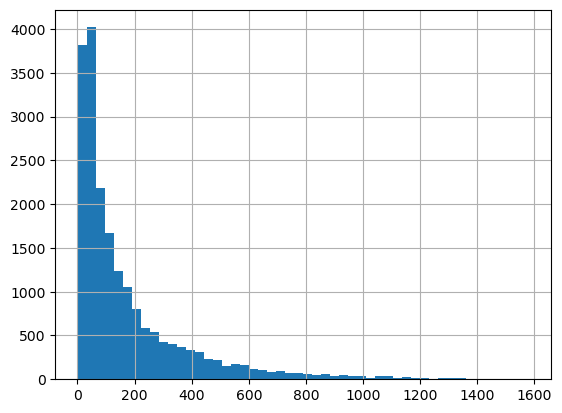

In [146]:
data['days_exposition'].hist(bins=50)

In [147]:
data['days_exposition'].describe()

count    19781.000000
mean       177.217128
std        215.559488
min          1.000000
25%         44.000000
50%         93.000000
75%        226.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [148]:
len(data[data['days_exposition'] > right_whisker('days_exposition')])

1625

In [149]:
data[data['days_exposition'] > right_whisker('days_exposition')].sort_values(by='days_exposition', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition
18843,11,3500000.0,48.20,2014-12-15,2,2.50,5,27.40,2,False,...,7.70,3,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,1580.0
9553,11,10600000.0,80.00,2014-12-09,3,2.85,17,44.00,9,False,...,15.00,0,Санкт-Петербург,17101.0,17110.0,0.0,NaN,0.0,NaN,1553.0
1885,2,13300000.0,79.60,2014-12-09,2,3.00,8,42.70,7,False,...,18.00,0,Санкт-Петербург,39393.0,11096.0,1.0,537.0,0.0,NaN,1513.0
6691,3,4400000.0,42.98,2014-12-12,1,NaN,5,18.72,1,False,...,11.31,0,Пушкин,19715.0,30358.0,1.0,439.0,3.0,232.0,1512.0
14093,7,9500000.0,100.00,2015-02-19,4,3.00,5,76.00,5,False,...,10.00,0,Санкт-Петербург,25950.0,4798.0,1.0,690.0,0.0,NaN,1497.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2705,19,28570000.0,130.00,2017-10-02,4,NaN,4,92.80,2,False,...,12.50,0,Санкт-Петербург,20250.0,1637.0,3.0,226.0,3.0,60.0,501.0
17547,7,18100000.0,130.00,2016-05-27,4,NaN,11,NaN,7,False,...,20.00,0,Санкт-Петербург,31744.0,4836.0,0.0,NaN,3.0,153.0,500.0
23016,8,4250000.0,42.00,2015-05-24,2,2.75,5,22.00,3,False,...,9.00,0,Санкт-Петербург,21959.0,6233.0,0.0,NaN,2.0,283.0,500.0
6083,10,4100000.0,63.00,2017-04-10,2,2.75,14,29.00,5,False,...,13.60,0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,500.0


Разброс достаточно большой. Проверим, можем ли мы удалить некоторые значения.

In [150]:
data[data['days_exposition'] > 1000]['days_exposition'].count()

243

In [151]:
data[data['days_exposition'] < 1]['days_exposition'].count()

0

In [152]:
data = data[(data['days_exposition'] <= 1000) | (data['days_exposition'].isna())]

Проверим итоговый размер отфильтрованного датасета

In [153]:
len(data)

22526

### Посчитаем и добавим в таблицу новые столбцы

**Добавим столбец Цена за один квадратный метр**

In [154]:
data['price_square_meter'] = data['last_price'] / data['total_area']

**Добавим слобец День недели публикации объявления**

In [155]:
data['day_of_post'] = data['first_day_exposition'].dt.weekday

**Добавим слобец Месяц публикации объявления**

In [156]:
data['month_of_post'] = data['first_day_exposition'].dt.month

**Добавим слобец Год публикации объявления**

In [157]:
data['year_of_post'] = data['first_day_exposition'].dt.year

**Добавим слобец Тип этажа квартиры**

In [158]:
data[data['floor'] == 0]['floor'].count()

0

In [159]:
data[data['floor'] < 0]['floor'].count()

0

Нулевых и отрицательных значение нет.

In [160]:
data['type_floor'] = data['floor']

In [161]:
data.loc[data['floor'] == 1, 'type_floor'] = 'первый'
data.loc[data['floor'] == data['floors_total'], 'type_floor'] = 'последний'
data.loc[(data['floor'] != 1) & (data['floor'] != data['floors_total']), 'type_floor'] = 'другой'

**Добавим слобец Расстояние до центра города в километрах**

In [162]:
data['city_center_km'] = round(data['city_centers_nearest'] / 1000, 0)

### Проведем исследовательский анализ данных

In [163]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22526 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22526 non-null  int64         
 1   last_price            22526 non-null  float64       
 2   total_area            22526 non-null  float64       
 3   first_day_exposition  22526 non-null  datetime64[ns]
 4   rooms                 22526 non-null  int64         
 5   ceiling_height        13762 non-null  float64       
 6   floors_total          22526 non-null  int64         
 7   living_area           20727 non-null  float64       
 8   floor                 22526 non-null  int64         
 9   is_apartment          22526 non-null  bool          
 10  studio                22526 non-null  bool          
 11  open_plan             22526 non-null  bool          
 12  kitchen_area          20351 non-null  float64       
 13  balcony         

Так как нам необходимо изучить каждый столбец в отдельности, необходимо определиться с  параметрами и инструментами, которые буду входить в исследование каждого объекта (столбца). В исследование включаем медиану, значение левого уса, правого уса, среднее значение, гистограмму и диаграмму распределения. \
Так как эти показатели будут применяться ко всем необходимым столбцам, то нужно создать функцию.

In [164]:
def print_value_hist(name_column):
    dict_value = {}
    dict_value['median'] = data[name_column].median()
    dict_value['mean'] = data[name_column].mean()
    dict_value['right_whisker'] = right_whisker(name_column)
    if left_whisker(name_column) <= data[name_column].min():
        dict_value['left_whisker'] = data[name_column].min()
    else:
        dict_value['left_whisker'] = left_whisker(name_column)
    print(dict_value)
    
    data[name_column].plot(kind='hist', grid=True, bins=50)

**Общая площадь**

Построим гистограмму и изучим распределение данных

{'median': 51.0, 'mean': 56.428645565124576, 'right_whisker': 107.5, 'left_whisker': 12.0}


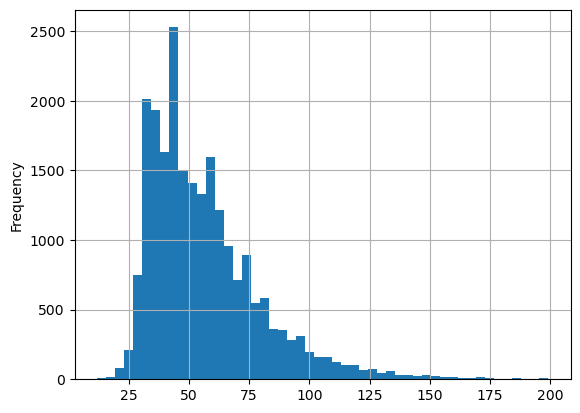

In [165]:
print_value_hist('total_area')

<AxesSubplot:>

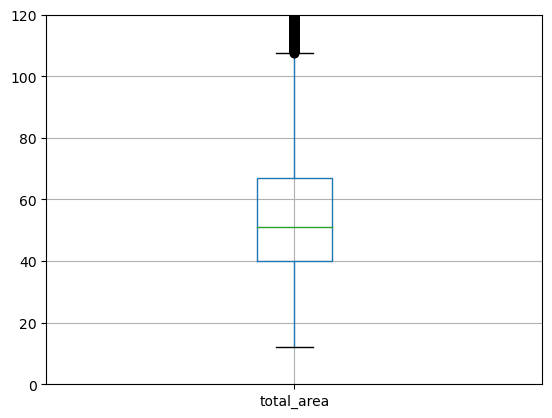

In [166]:
plt.ylim(0, 120)
data.boxplot(column='total_area')

Медианное значение площади квартиры практически соответствует той площади, которая есть у наибольшего количества пользователей. Значение левого уса логично не достигает 0, так как таких квартир просто нет, а правый ус выходит за пределы значения 100. Это объясняется тем, что больших квартир не много и как правило относится к элитному жилью.

**Жилая площадь**

{'median': 30.0, 'mean': 32.248001230858, 'right_whisker': 75.5, 'left_whisker': 10.0}


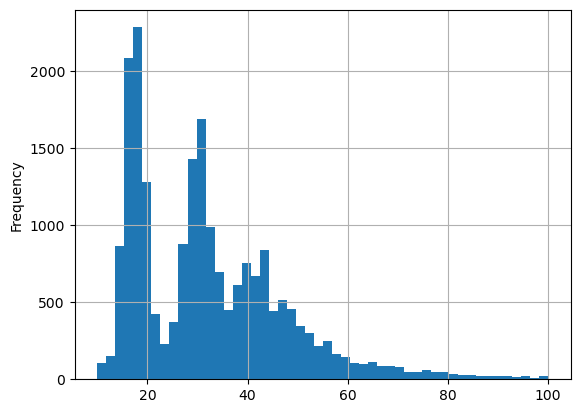

In [167]:
print_value_hist('living_area')

<AxesSubplot:>

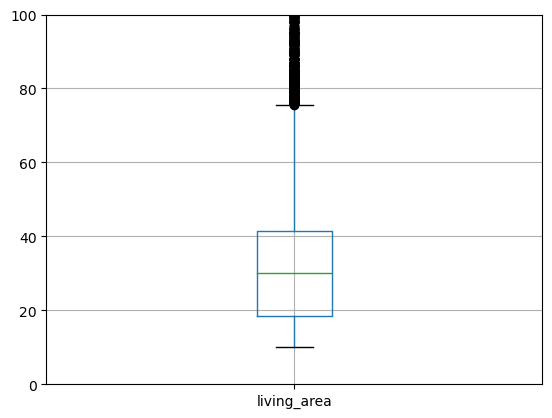

In [168]:
plt.ylim(0, 100)
data.boxplot(column='living_area')

В данных можно наблюдать три пика, скорее всего это объясняется тем, что квартиры относятся к разным категориям населения. Первый (самый левый пик) - жилье ниже среднего класса, второй - средний класс, третий - выше среднего класса. Также учесть, что медианное значение практически совпадает со средним пиком. А среднее и медиана, как и в предыдущих данных незначительно отличается.

**Площадь кухни**

{'median': 9.0, 'mean': 10.04413689744976, 'right_whisker': 18.25, 'left_whisker': 3.0}


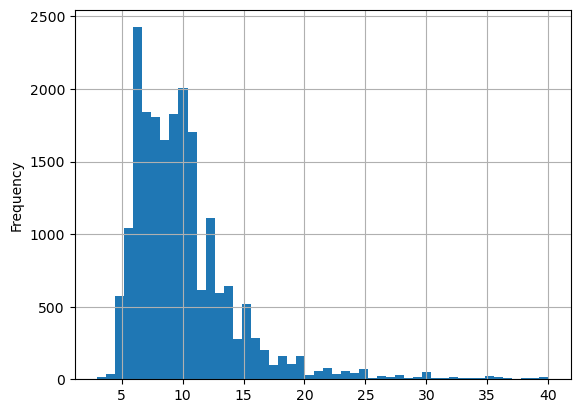

In [169]:
print_value_hist('kitchen_area')

<AxesSubplot:>

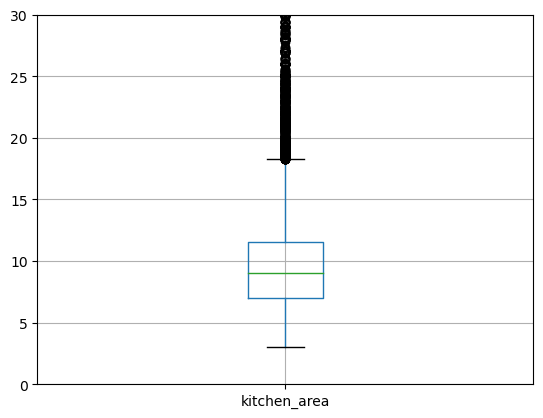

In [170]:
plt.ylim(0, 30)
data.boxplot(column='kitchen_area')

Наибольший пик приходится на площадь кухни равной 6, таким образом медиана от площади с самым больших количеством ее обладателей. Правый и левый усы как и в предыдущих данных предсказуемы. Кухня не может быть с нулевой площадью, но есть кухни достаточно большие, как правило в элитных квартирах, из-за которых появляется выброс.

**Цена объекта**

{'median': 4550000.0, 'mean': 5521902.695107875, 'right_whisker': 11150000.0, 'left_whisker': 430000.0}


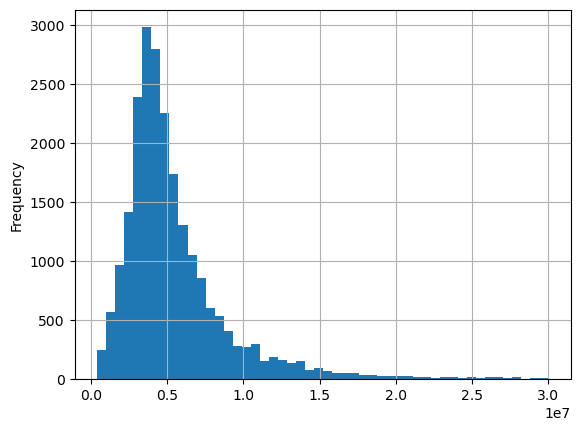

In [171]:
print_value_hist('last_price')

<AxesSubplot:>

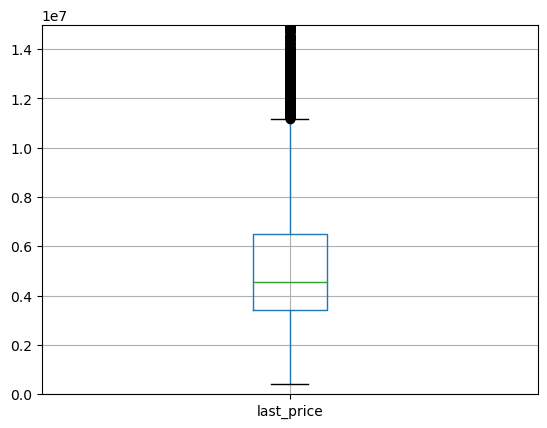

In [172]:
plt.ylim(0, 15000000)
data.boxplot(column='last_price')

Медиана практически совпадает с пиком той цены, по которой продается наибольшее количество квартир. Среднее значение отличается от медианы прежде всего потому, что разброс стоимости жилья в Санкт-Петербурге достаточно большой, много элитной недвижимости. Этим также объясняется значение правого уса.

**Количество комнат**

{'median': 2.0, 'mean': 2.0006215040397763, 'right_whisker': 6.0, 'left_whisker': 0}


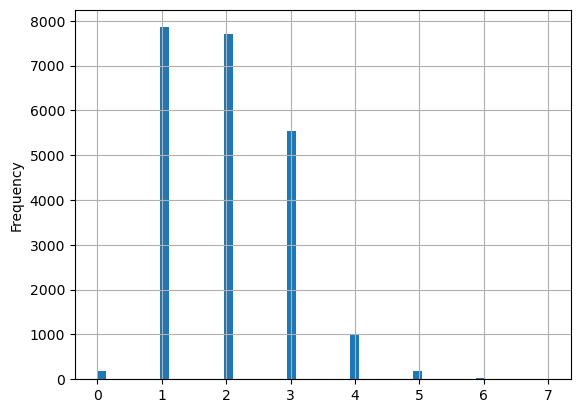

In [173]:
print_value_hist('rooms')

<AxesSubplot:>

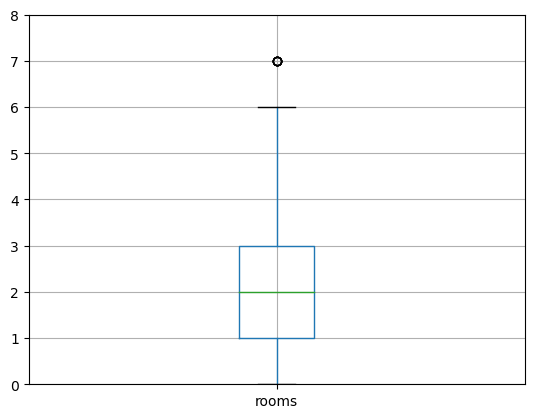

In [174]:
plt.ylim(0, 8)
data.boxplot(column='rooms')

Диаграма показывает, что из-за небольшого количества разных значений, эти данные становятся категориальными. Таким образом левый ус равен нулю по той причине, что скорее всего некоторые пользотели считали, что в однокомнатной квартире нет комнат, принимая во внимание то, что комнатой является спальня и другое жилое пространство. Правый ус сообщает нам о том, что есть квартиры с большим количеством комнат, однако в основном квартиры имеют одну или две комнаты.

**Высота потолков**

{'median': 2.65, 'mean': 2.7100690306640955, 'right_whisker': 3.2499999999999996, 'left_whisker': 2.0500000000000003}


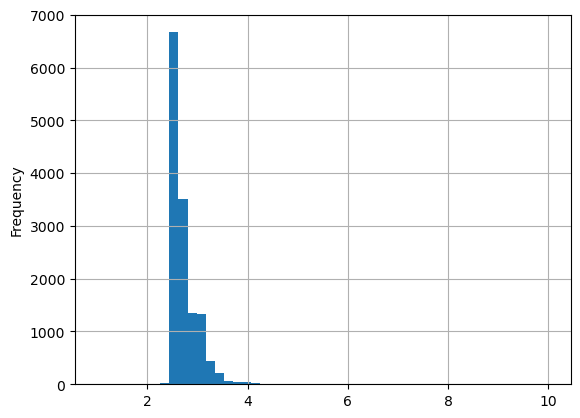

In [175]:
print_value_hist('ceiling_height')

<AxesSubplot:>

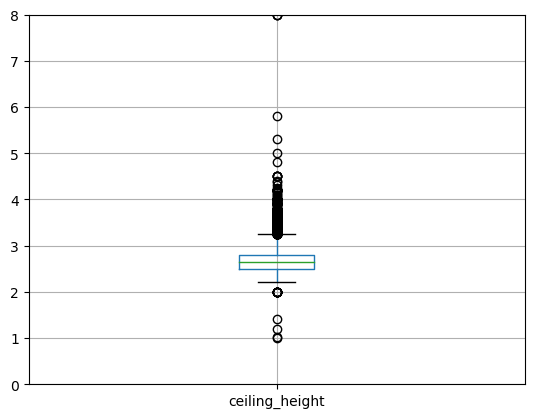

In [176]:
plt.ylim(0, 8)
data.boxplot(column='ceiling_height')

Медиана и среднее незначительно отличаются друг от друга. Действительно, стандартная высота потолков равна примерно 2.7 метра. Однако есть разбросы, но и они объяснимы тем, что есть недвижимость с низкими потолками и с высоками, которых больше

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Высота потолков приближена к реальности. Значения около 3.5 метров могут свидетельствовать о том, что эти квартиры относятся к дореволюционной застройке с высокими потолками. 
</div 

**Этаж квартиры**

{'median': 4.0, 'mean': 5.839208026280742, 'right_whisker': 17.0, 'left_whisker': 1}


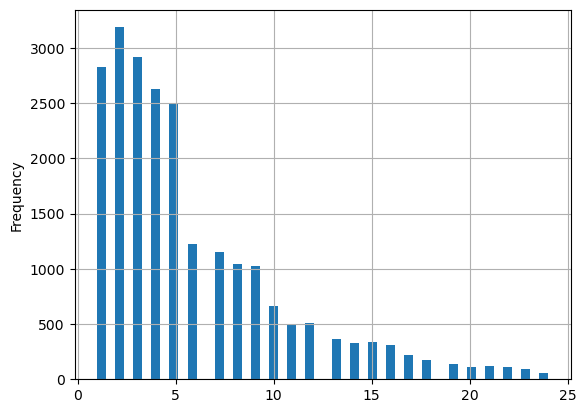

In [177]:
print_value_hist('floor')

<AxesSubplot:>

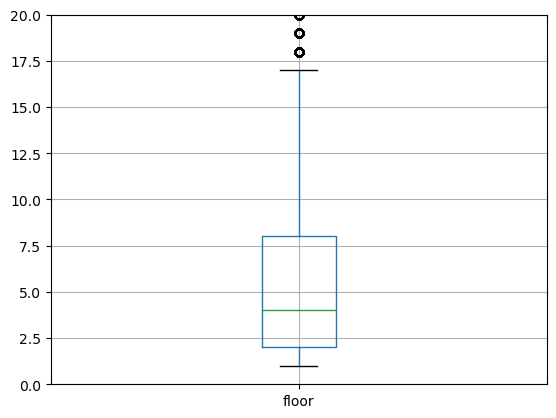

In [178]:
plt.ylim(0, 20)
data.boxplot(column='floor')

Данные по сути категориальные, так как значений не много. Пик приходится на второй этаж, однако из-за того, что достаточно много квартир расположено на более высоких этажах медиана равна 4, а среднее больше 5. Левый ус показывает, что нулевых этажей нет, а правый ус, что квартиры есть на верхних этажах.

**Тип этажа**

Так как эти данные имеют не числовое значение, то мы не будем применять функцию print_value_hist. \
Мы построим только диаграмму

<AxesSubplot:>

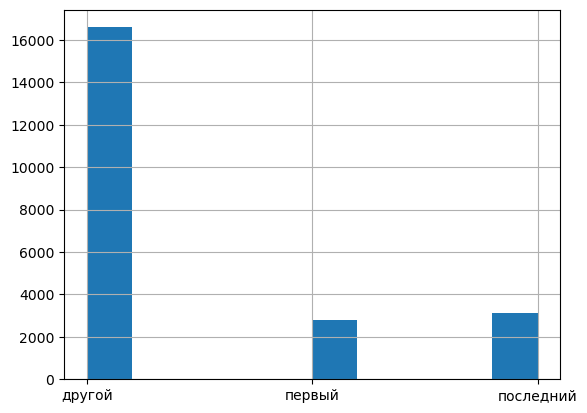

In [179]:
data['type_floor'].hist()

Наибольшее количество квартир продается не на первом и не на последнем этаже, что логично

**Общее количество этажей в доме**

{'median': 9.0, 'mean': 10.676462754150759, 'right_whisker': 32.5, 'left_whisker': 1}


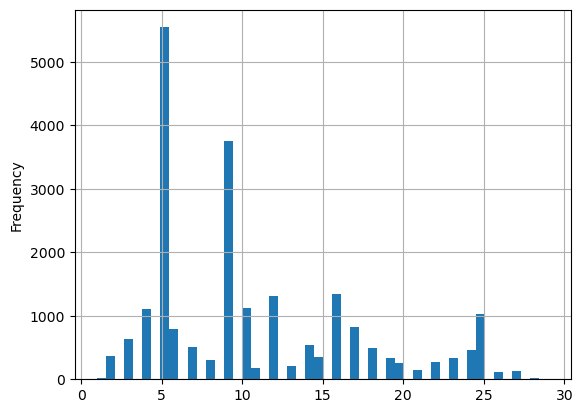

In [180]:
print_value_hist('floors_total')

<AxesSubplot:>

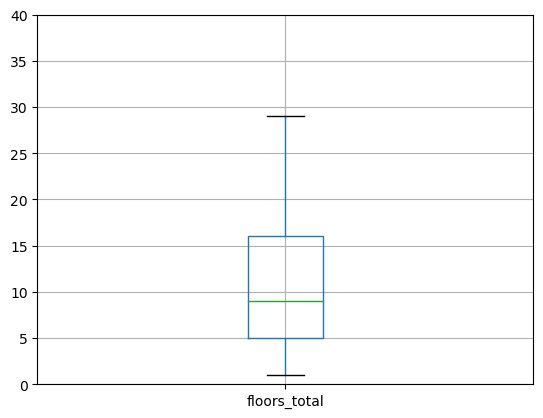

In [181]:
plt.ylim(0, 40)
data.boxplot(column='floors_total')

In [182]:
data['floors_total'].max()

29

В данных присутствует два пика, один из которых приходится на медианное значение. Хрущевок-пятиэтажек все еще много в России и Петербург не исключение, поэтому они представлены в самом большом количестве. Правый ус выходит за пределы имеющихся данных. 

**Растояние до центра города в метрах**

{'median': 13271.0, 'mean': 14494.719433719434, 'right_whisker': 26338.5, 'left_whisker': 208.0}


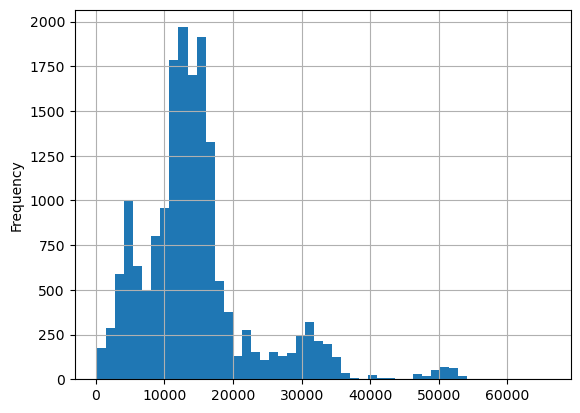

In [183]:
print_value_hist('city_centers_nearest')

<AxesSubplot:>

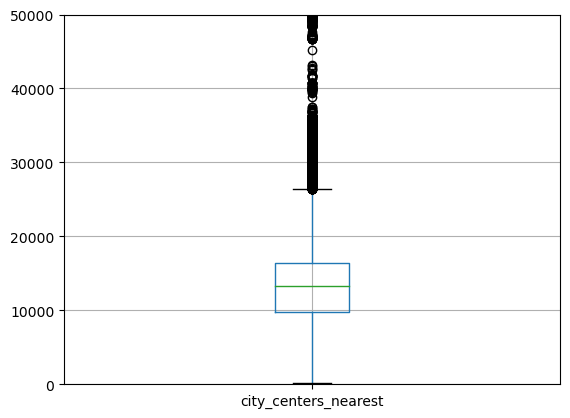

In [184]:
plt.ylim(0, 50000)
data.boxplot(column='city_centers_nearest')

Медиана совпадает с пиком данных. Среднее значение не на много отличается от медианы. Действительно, наибольшее количество квартир скорее всего продают в спальных районах, которые расположены примерно в 13 км от центра (не близко, но и не слишком далеко). Левый ус расположен в 200 м от центра, что является оптимальным, учитывая то, что в нуле вряд ли будет находится квартира, так как обычно центром считается колонна на дворцовой площади. Правый ус показывает, что есть квартиры, которые продаются за пределами КАДа, так как Петербург достаточно большой город.

**Расстояние до ближайшего аэропорта**

{'median': 26938.0, 'mean': 28851.105774862364, 'right_whisker': 65979.125, 'left_whisker': 6450.0}


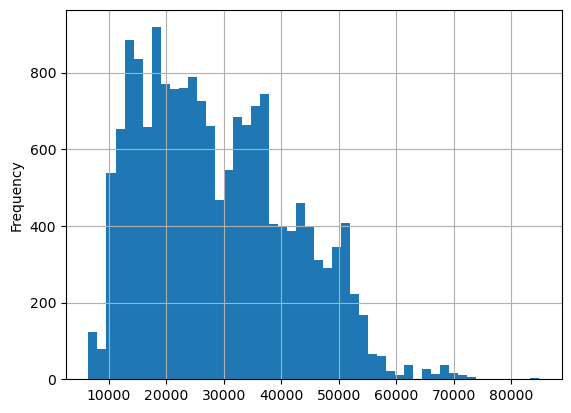

In [185]:
print_value_hist('airports_nearest')

<AxesSubplot:>

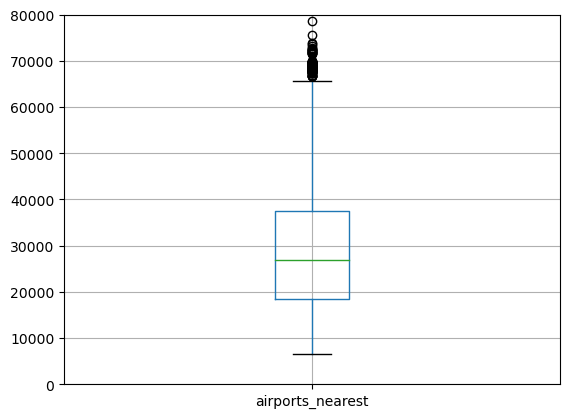

In [186]:
plt.ylim(0, 80000)
data.boxplot(column='airports_nearest')

В данных мы можем отчетливо наблюдать 2 пика: первый в районе 18 км, а второй - 37 км. Так как в Петербурге основной аэропорт Пулково, то можно предположить, что это как раз те самые спальные районы удаленные от центра на 13 км. Медианное значение находится между этими пиками. Правый ус показывает, что есть недвижимость сильно удаленная от аэропорта, а значит и от центра (это было показано в предыдущих данных). Левый ус показывает, что в непосредственной близости аэропорта скорее всего не продают недвижимость. 

**Расстояние до ближайшего парка**

{'median': 453.0, 'mean': 467.69613930885527, 'right_whisker': 1088.0, 'left_whisker': 7.0}


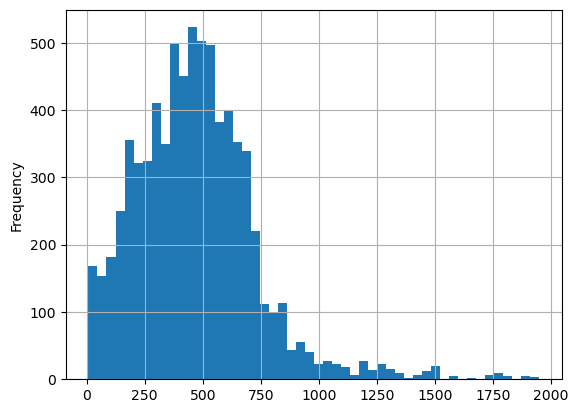

In [187]:
print_value_hist('parks_nearest')

<AxesSubplot:>

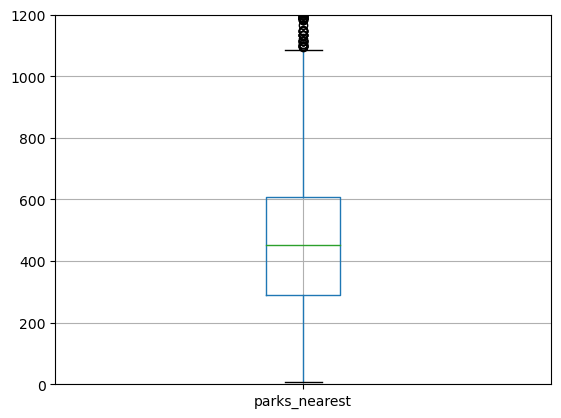

In [188]:
plt.ylim(0, 1200)
data.boxplot(column='parks_nearest')

Больше всего парков расположено в радиусе 500 метров, медиана также близка к этому значению. Значение левого уса означает, что некоторые квартиры расположены практически в парке, а правый ус - некоторые квартиры расположены в больших жилых массивах и рядом нет парков.

**День публикации объявлении**

{'median': 3.0, 'mean': 2.5715617508656665, 'right_whisker': 8.5, 'left_whisker': 0}


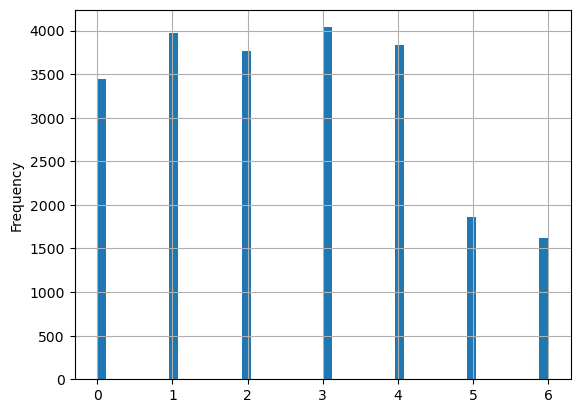

In [189]:
print_value_hist('day_of_post')

<AxesSubplot:>

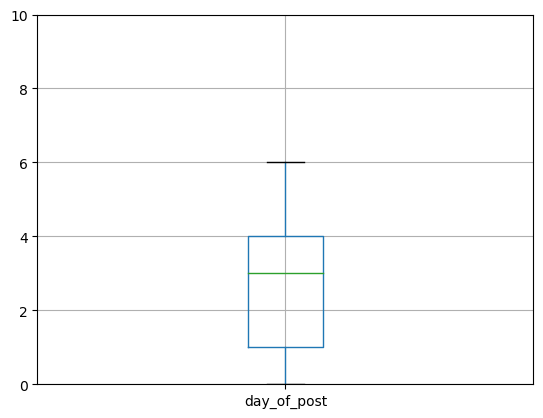

In [190]:
plt.ylim(0, 10)
data.boxplot(column='day_of_post')

Эти категориальные данные, большая часть публикующихся объявлений происходит во вторник и четверг. Медиана совпадает с пиком

**Месяц публикации объявлении**

{'median': 6.0, 'mean': 6.404421557311551, 'right_whisker': 20.5, 'left_whisker': 1}


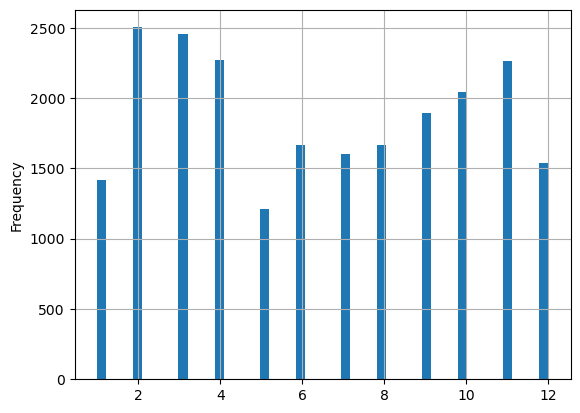

In [191]:
print_value_hist('month_of_post')

<AxesSubplot:>

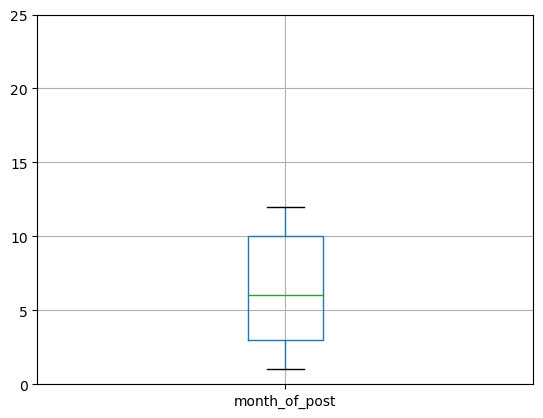

In [192]:
plt.ylim(0, 25)
data.boxplot(column='month_of_post')

Это категориальные данные, большая часть объявлений публикуется в феврале и марте. Также большая часть публикуется в ноябре. В связи с этим, медиана равняется 6

**Изучим как быстро продавались квартиры**

{'median': 92.0, 'mean': 164.9301873272597, 'right_whisker': 476.5, 'left_whisker': 1.0}


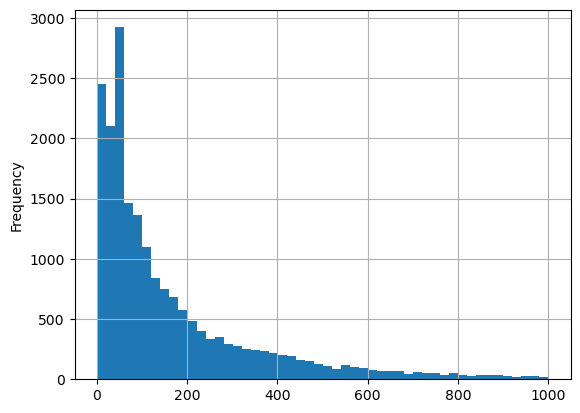

In [193]:
print_value_hist('days_exposition')

In [194]:
data['days_exposition'].describe()

count    19538.000000
mean       164.930187
std        185.863223
min          1.000000
25%         44.000000
50%         92.000000
75%        217.000000
max       1000.000000
Name: days_exposition, dtype: float64

Медианное значение равно 92 дня, однако среднее значение сильно отличается от медианы и равно 164 дня. Прежде всего, это связано с тем, что данные имеют сильный разброс, поэтому можно считать, что обычно продажа квартиры занимает 92 дня. \
Необычайно быстрыми продажами можно считать те, которые продались быстрее, чем за 44 дня, а необычайно долгими - больше 217 дней.

#### Изучим какие факторы больше всего влияют на полную стоимость квартиры

Так как нам нужно исследовать на зависисимость несколько параметров: 6 шт, создадим функцию, которая будет строить график зависимости и выводить на экран коэффициент корреляции.

In [195]:
def print_corr_graph(depend_column1, depend_column2):
    data.plot(x=depend_column2, y=depend_column1, kind='scatter', grid=True, alpha=0.3)
    print(data[depend_column2].corr(data[depend_column1]))

**Зависимость цены от общей площади**

0.7700773399491864


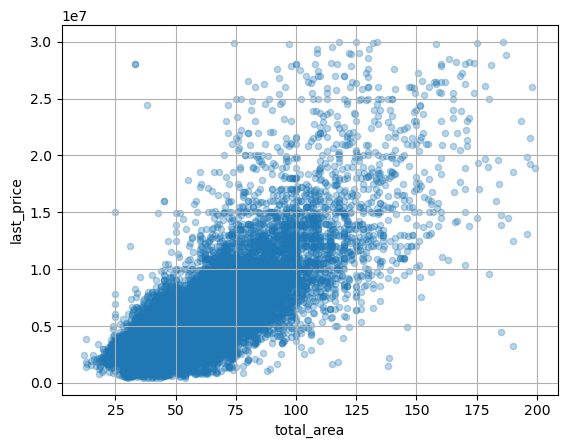

In [196]:
print_corr_graph('last_price', 'total_area')

Между общей площадью и ценой зависимость достаточно высокая. От увеличения площади повышается цена. 

**Зависимость цены от жилой площади**

0.6502949989766268


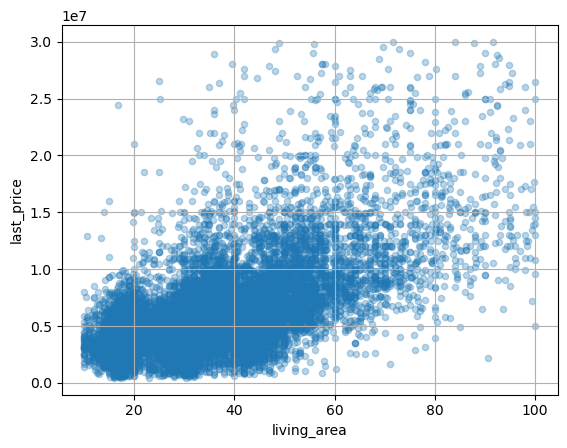

In [197]:
print_corr_graph('last_price', 'living_area')

Зависимость между жилой площадью и ценой также есть, однако она меньше, чем у общей площади. Это нормально, так как под жилой площадью часто подразуумевают спальни без гостинных, а как правило там тоже живут. Плюс ко всему у многих квартир свободная планировка.

**Зависимость цены от площади кухни**

0.5868844021612731


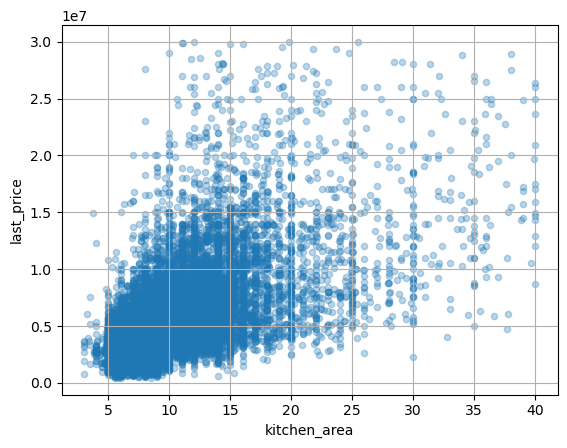

In [198]:
print_corr_graph('last_price', 'kitchen_area')

Зависимость есть, но она уже гораздо слабее зависимости общей площади и жилой площади. Жильцы на кухне только готовят и едят, не проводя большую часть времени там.

**Зависимость цены от количества комнат**

0.4726240890268783


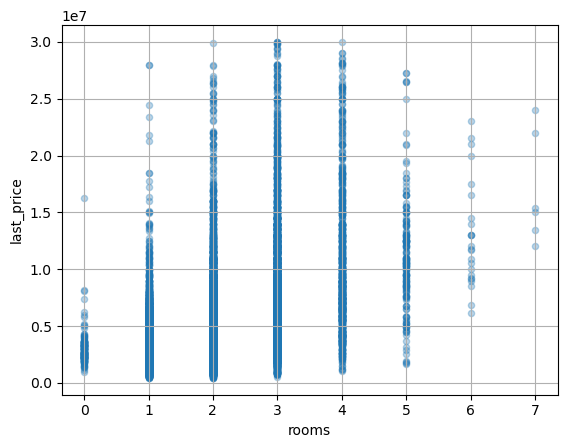

In [199]:
print_corr_graph('last_price', 'rooms')

Зависимость слабая, можно наблюдать, что большинство высоких цен приходится на квартиры с тремя комнатами и меньше всего с 7-ю комнатами

**Зависимость цены от типа этажа**

Так как тип этажа является не числовым типом, то необходимо использовать другой инструмент. Создадим новый датасет в котором будет медианное значение стоимости жилья к каждому типу этажа. А затем выведем диаграмму.

In [200]:
data['type_floor'].value_counts()

другой       16594
последний     3128
первый        2804
Name: type_floor, dtype: int64

<AxesSubplot:xlabel='type_floor'>

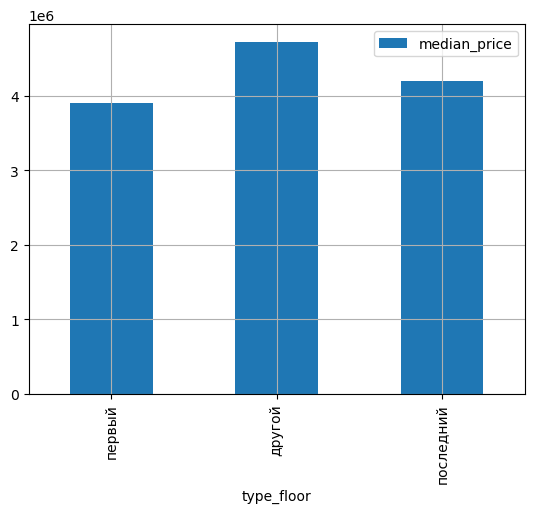

In [201]:
data_new = pd.DataFrame({
    'type_floor': ['первый', 'другой', 'последний'],
    'median_price': [
        data[data['type_floor'] == 'первый']['last_price'].median(), 
        data[data['type_floor'] == 'другой']['last_price'].median(), 
        data[data['type_floor'] == 'последний']['last_price'].median()
    ]
})
data_new.plot(x='type_floor', y='median_price', kind='bar', grid=True)

Дешевле всего недвижимость на первом этаже, затем на последнем и самая дорогая недвижимость на других этажах

**Зависимость цены от дня публикации**

-0.017410893310202662


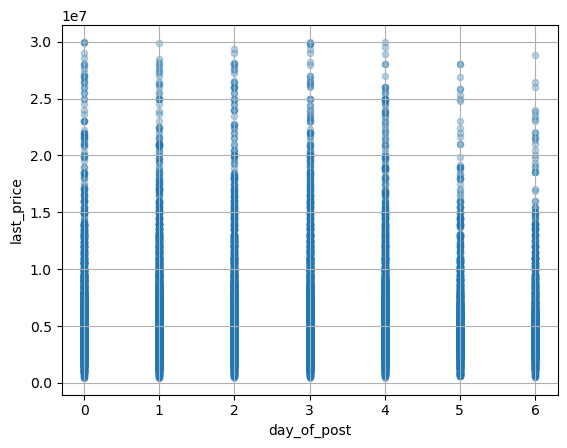

In [202]:
print_corr_graph('last_price', 'day_of_post')

Зависимости практически нет, так как люди публикуют свои объявления в разные дни любой квартиры.

**Зависимость цены от месяца публикации**

0.0043095673212799794


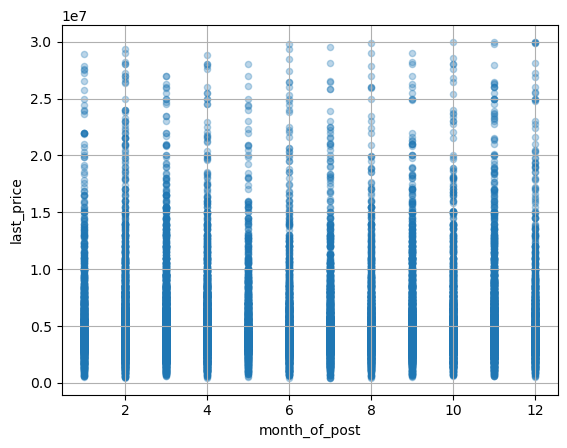

In [203]:
print_corr_graph('last_price', 'month_of_post')

Зависимости практически нет, так как люди публикуют свои объявления в разные месяцы любой квартиры.

**Зависимость цены от года публикации**

-0.012342979238166242


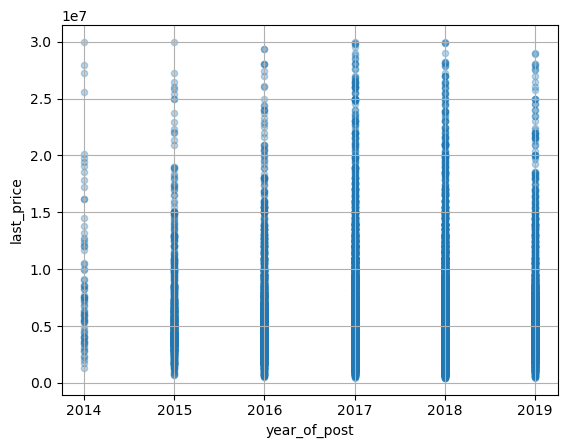

In [204]:
print_corr_graph('last_price', 'year_of_post')

Зависимости практически нет, так как люди публикуют свои объявления в разные годы любой квартиры.

#### Посчитаем среднюю цену одного квадратного метра в 10 населенных пунктах

In [205]:
famous_town = data.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head(10)
famous_town


locality_name
Санкт-Петербург      14744
посёлок Мурино         499
посёлок Шушары         432
Всеволожск             394
Пушкин                 353
Колпино                333
Гатчина                306
посёлок Парголово      304
деревня Кудрово        293
Выборг                 235
Name: locality_name, dtype: int64

In [206]:
dict_town = {}
for item in range(len(famous_town)):
    dict_town[famous_town.index[item]] = data[data['locality_name'] == famous_town.index[item]]['price_square_meter'].mean()
    
dict_town

{'Санкт-Петербург': 110150.72718319659,
 'посёлок Мурино': 85921.5302364846,
 'посёлок Шушары': 78667.16526230852,
 'Всеволожск': 68699.98423973296,
 'Пушкин': 102819.2349850405,
 'Колпино': 75179.47561704344,
 'Гатчина': 68797.70204674687,
 'посёлок Парголово': 90111.44840136102,
 'деревня Кудрово': 92451.00902891581,
 'Выборг': 57911.258095433215}

Самая высокая стоимость за 1 кв м как и можно было предположить оказался у Санкт-Петербурга. А самая низкая стоимость в Выборге - неудивительно Выборг находится практически на границе с Финляндией.

#### Вычислим среднюю цену каждого километра

In [207]:
data[data['locality_name'] == 'Санкт-Петербург'].pivot_table(index=['city_center_km'], values='last_price', aggfunc='mean')





,last_price
city_center_km,
0.0,9.606154e+06
1.0,1.119442e+07
2.0,1.035221e+07
3.0,9.140075e+06
4.0,9.759587e+06
5.0,1.029821e+07
6.0,9.100295e+06
7.0,9.134580e+06
8.0,8.496225e+06


Также построим сводную таблицу по стоимости одного квадратного метра 

In [208]:
data[data['locality_name'] == 'Санкт-Петербург'].pivot_table(index=['city_center_km'], values='price_square_meter', aggfunc='mean')




,price_square_meter
city_center_km,
0.0,118752.879316
1.0,145114.074087
2.0,130874.537546
3.0,117120.812427
4.0,125824.818987
5.0,131963.597684
6.0,131262.359686
7.0,131447.723515
8.0,123268.304448


Проверим корреляцию last_price и price_square_meter с city_center_km

-0.34163320366158656


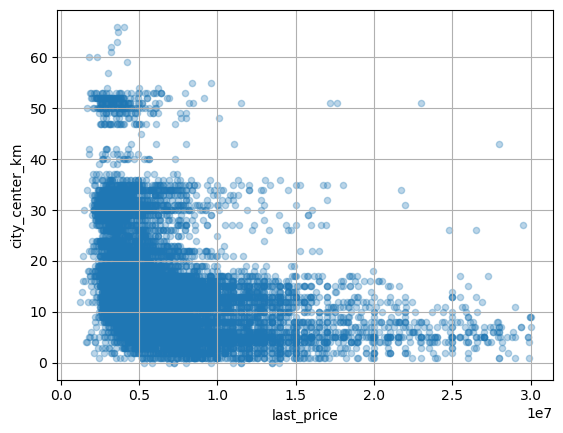

In [209]:
print_corr_graph('city_center_km', 'last_price')

-0.3852057979157914


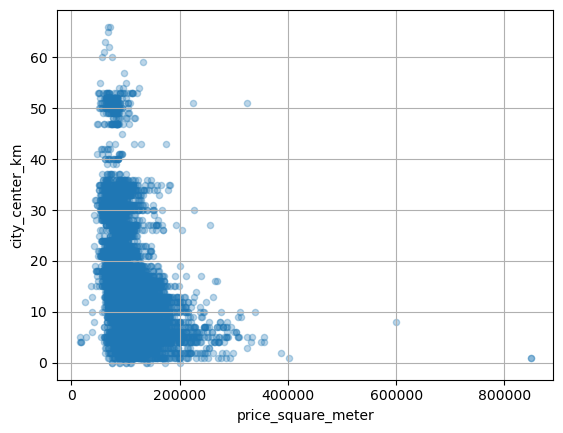

In [210]:
print_corr_graph('city_center_km', 'price_square_meter')

Между данными существует зависимость. Причем обратная зависимость, чем ближе к центру тем дороже квартиры, как и цена за квадратный метр

### Общий вывод

Рассматриваемый нами датасет не лишен недостатков. Прежде всего, существует слишком много пропусков картографических данных, которые скорее всего загружались некорректно. \
Вывод: необходимо сначала обратиться к backend-разработчикам и выяснить в чем дело, а затем, если это потребуется, указать на то, что необходимо улучшить выгрузку данных. \
\
Достаточно много пропусков по вине пользователя - не заполняют данные. Нужно обратиться к frontend-разработчикам, чтобы выяснить какая ситуация сложилась вокруг интерфеса: удобен ли он, понимают ли пользователи что нужно заполнять и тд. \
\
Стоит дополнить датасет годом постройки дома, в котором находится продаваемая квартира - это существенно влияет на скорость продажи и стоимости. Также можно добавить булевый тип: выход окон на реку - так же влияет на стоимости и в отличие от многих других городов в Петербурге таких объявлений должно быть достаточно. Расстояние до ближайшего метро - влияет на цену недвижимости, поэтому тоже стоит добавить. \
\
Стоит отметить, что большим спросом пользуются небольшие квартиры - студии.